In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [62]:
data = pd.read_csv("/Users/mohamedeldagla/Desktop/senior year/New Trends in AI/Epilepsy - GANs/Data/Epileptic Seizure Recognition.csv")

In [63]:
data.drop(columns=['Unnamed'],inplace=True)

In [64]:
data.loc[data['y'] != 1, 'y'] = 0

/var/folders/kx/tf5bbbjj20gckm28dqr1ftzm0000gn/T/ipykernel_1381/1918735684.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['y'], palette="viridis")


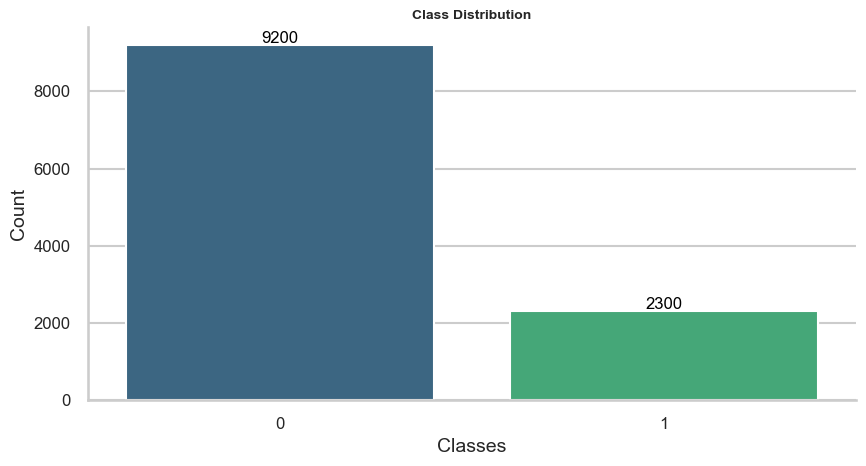

In [65]:
sns.set_theme(style="whitegrid", context="talk")

# Create the count plot
plt.figure(figsize=(9, 5))
ax = sns.countplot(x=data['y'], palette="viridis")

ax.set_title("Class Distribution", fontsize=10, fontweight='bold')
ax.set_xlabel("Classes", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.tick_params(axis='both', labelsize=12)

# Add count annotations on the bars
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
sns.despine()

plt.show()

In [66]:
X = data.drop("y",axis=1)
y = data['y']

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)


X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

In [80]:
X_train.shape

(9200, 1, 178)

In [81]:
model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(1, 178)),
    LSTM(128, activation='relu', return_sequences=True),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                  │ (None, 1, 128)         │       157,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_37 (LSTM)                  │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_38 (LSTM)                  │ (None, 1, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 375,490 (1.43 MB)

 Trainable params: 375,490 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [83]:
history = model.fit(X_train, y_train, epochs=25, batch_size=65, validation_data=(X_test,y_test))

Epoch 1/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8611 - loss: 0.5948 - val_accuracy: 0.9330 - val_loss: 0.2730
Epoch 2/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9358 - loss: 0.2533 - val_accuracy: 0.9504 - val_loss: 0.1616
Epoch 3/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9516 - loss: 0.1566 - val_accuracy: 0.9509 - val_loss: 0.1407
Epoch 4/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9640 - loss: 0.1067 - val_accuracy: 0.9561 - val_loss: 0.1256
Epoch 5/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9644 - loss: 0.1082 - val_accuracy: 0.9596 - val_loss: 0.1176
Epoch 6/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9692 - loss: 0.0908 - val_accuracy: 0.9604 - val_loss: 0.1104
Epoch 7/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9750 - loss: 0.0760 - val_accuracy: 0.9578 - val_loss: 0.1110
Epoch 8/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9791 - loss: 0.0661 - val_accuracy: 0.

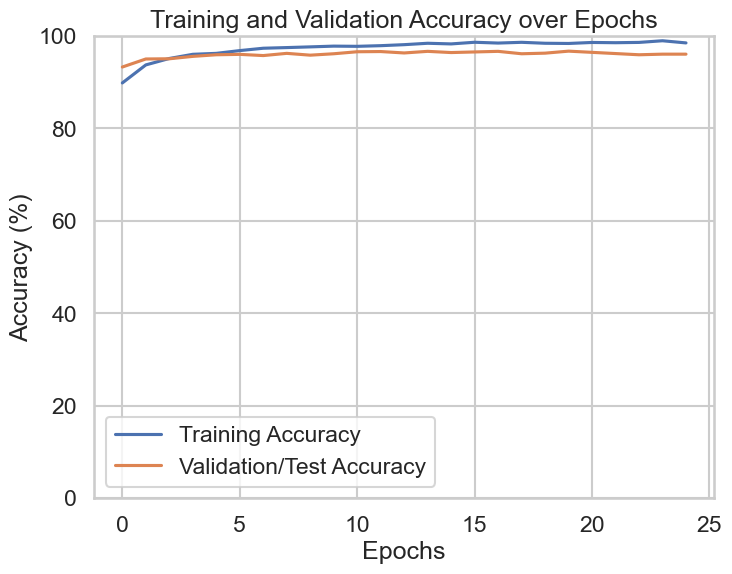

In [84]:
import matplotlib.pyplot as plt

# Convert accuracy to percentage and plot
plt.figure(figsize=(8, 6))

# Plot training and validation accuracy as percentages
plt.plot([x * 100 for x in history.history['accuracy']], label='Training Accuracy')
plt.plot([x * 100 for x in history.history['val_accuracy']], label='Validation/Test Accuracy')

# Set title and labels
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

# Set y-axis limits from 0 to 100
plt.ylim(0, 100)

# Add legend
plt.legend()

# Display the plot
plt.show()

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


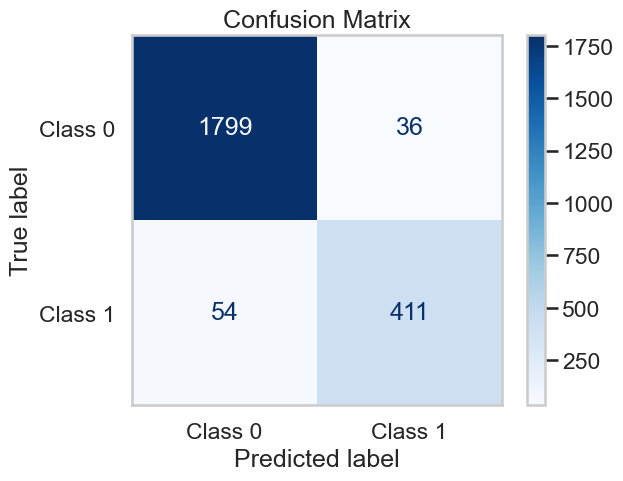

              precision    recall  f1-score   support

     Class 0       0.97      0.98      0.98      1835
     Class 1       0.92      0.88      0.90       465

    accuracy                           0.96      2300
   macro avg       0.95      0.93      0.94      2300
weighted avg       0.96      0.96      0.96      2300



In [85]:
y_pred_prob2 = model.predict(X_test)  # Get probabilities
y_pred = np.argmax(y_pred_prob2, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot-encoded true labels to class labels

cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Generate and print the classification report
report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'])
print(report)